<a href="https://colab.research.google.com/github/JoaoGustavo29/Portfolio_DataScience/blob/master/Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Churn Prediction

*Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Ela é de extrema importância para a administração e sua análise ao longo do tempo pode mostrar que existe algum problema que deve ser atacado.

*Churn* também pode ser usado para identificar potenciais cancelamentos, com um tempo de antecedência, e promover ações direcionadas para tentar reter tais clientes. Essa métrica deve receber atenção pelo fato de que o Custo de Aquisição de Cliente (CAC) é normalmente mais alto que o custo para mantê-los. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [ ]:
# instalar pacotes necessários
! pip install -q scikit-plot

In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scikitplot as skplt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import QuantileTransformer, PowerTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# importar Warnings filter
from warnings import simplefilter

# ignorar futuros warnings
simplefilter(action='ignore', category=FutureWarning)

# configurar notebook
sns.set_style('dark')

# importar os dados
DATA_PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# ver as 5 primeiras entradas
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Esse foi um dos projetos mais extensos que já fiz e por isso vou mostrar como ficou dividido, assim você (leitor) pode ir direto até a parte que lhe interessa.

O projeto ficou dividido da seguinte forma: 


*   Análise Exploratória

*   Limpeza dos Dados

*   Processamento dos Dados com Label Encoder e Get Dummies

*   Preparação dos Dados





## Instruções para o modelo de churn prediction

ENTENDA O SEU PROBLEMA
* Olhar o todo e delimitar o escopo do projeto
* Como a solução vai ser usada?
* Quais são as soluções já existentes?
* Qual abordagem usar?
    * Aprendizado Supervisionado
    * Aprendizado Não Supervisionado
    * Aprendizado Por Reforço
* Qual é a métrica de performance?
* Qual a performance mínima esperada para atingir o objetivo?
* Liste as premissas básicas do projeto
* Pesquise sobre *churn rate* no Google
* Veja os serviços que outras empresas de Telecom oferecem 


# Análise Exploratória


* Estudar cada atributo e suas características:
    * Nome
    * Tipo
        * Categórica
        * Numérica
            * int
            * float
        * Estruturada
        * Não Estruturada
        * etc

In [ ]:
# Checar as dimensões do DataFrame
print(f'O DataFrame possui {df.shape[0]} entradas e {df.shape[1]} colunas.')

# Checar o nome das colunas
print(f'\nNome das Colunas:\n{df.columns.values}')

# Checar o tipo de dados (por coluna)
print(f'\nTipos de dados (por coluna)\n{df.dtypes}')

# Checar os valores únicos por coluna
print(f'\nValores únicos (por coluna)\n{df.nunique()}')


O DataFrame possui 7043 entradas e 21 colunas.

Nome das Colunas:
['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn']

Tipos de dados (por coluna)
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: ob

* % de valores ausentes

In [ ]:
# Checar a quantidade de dados ausentes
print(f'Porcentagem de dados ausentes:\t\n{df.isnull().sum() / df.shape[0]}')

Porcentagem de dados ausentes:	
customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


# Limpeza dos Dados

In [ ]:
def str_to_float(entrada):
  try:
    return float(entrada)
  except ValueError:
    return np.nan

df_clean = df.copy()

df_clean.drop('customerID', axis=1, inplace=True)

df_clean['TotalCharges'] = df_clean['TotalCharges'].apply(str_to_float)

print('Dados ausentes em "TotalCharges" antes de preencher os dados: {}'.format(df_clean['TotalCharges'].isnull().sum()))

total_charges_median = df_clean.TotalCharges.median()
df_clean['TotalCharges'].fillna(total_charges_median, inplace=True)

Dados ausentes em "TotalCharges" antes de preencher os dados: 11


  * Ruído nos dados e tipo de ruído (outliers, estocásticos, erros de arredondamento)

In [ ]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


* Tipo de distribuição
        * Gaussiana
        * Uniforme
        * Logarítmica
        * etc

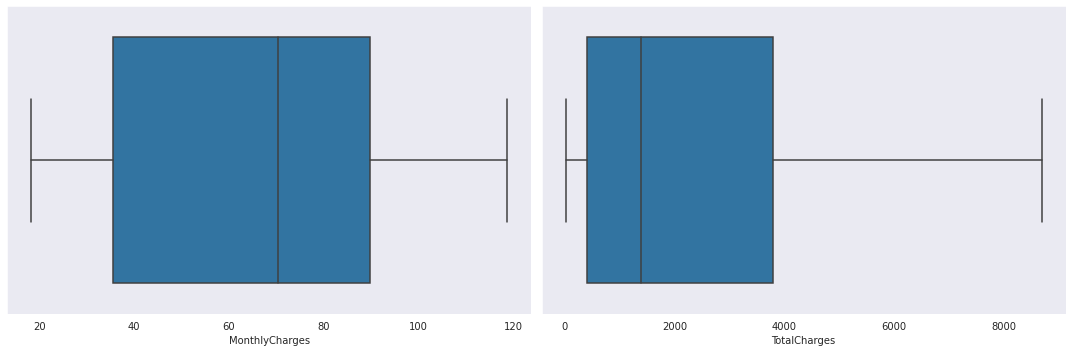

In [ ]:
fig , ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.boxplot(df_clean['MonthlyCharges'], ax=ax[0])
sns.boxplot(df_clean['TotalCharges'], ax=ax[1])

plt.tight_layout();

* Visualizar os dados

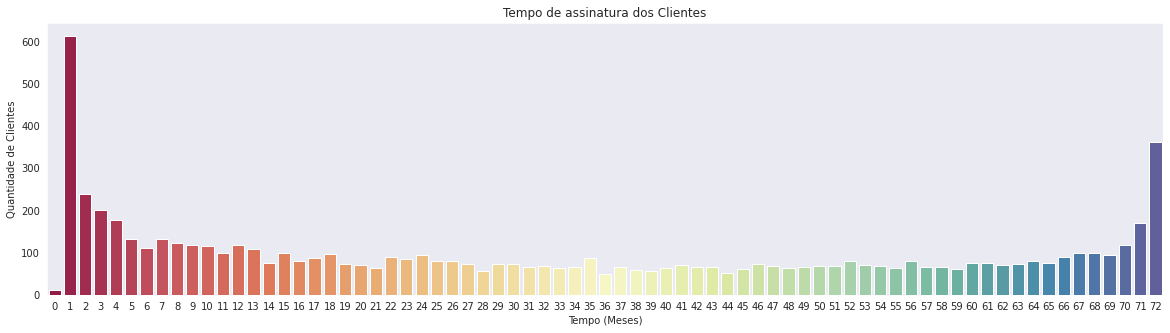

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))

sns.countplot(df_clean['tenure'], data=df_clean, palette='Spectral', ax=ax)
ax.set_title('Tempo de assinatura dos Clientes')
ax.set_ylabel('Quantidade de Clientes')
ax.set_xlabel('Tempo (Meses)')

plt.show();

In [ ]:
# verificar valroes unicos para variaveis categoricas
np.unique(df_clean.select_dtypes('object').values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'No internet service',
       'No phone service', 'One year', 'Two year', 'Yes'], dtype=object)

In [ ]:
df_clean.replace({'No internet service': 'No'}, regex=True, inplace=True)
df_clean.replace({'No phone service': 'No'}, regex=True, inplace=True)

In [ ]:
np.unique(df_clean.select_dtypes('object').values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'One year', 'Two year', 'Yes'],
      dtype=object)

In [ ]:
# Checar os valores únicos por coluna
print(f'\nValores únicos (por coluna)\n{df_clean.nunique()}')


Valores únicos (por coluna)
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


No     5174
Yes    1869
Name: Churn, dtype: int64

Churns representam 26.5370% do dataset.



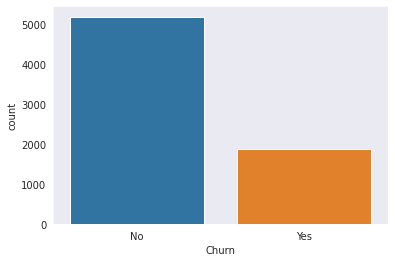

In [ ]:
print(df_clean.Churn.value_counts())
print('\nChurns representam {:.4f}% do dataset.\n'.format((df_clean[df_clean.Churn == "Yes"].shape[0] / df.shape[0]) * 100))

sns.countplot(df_clean.Churn)
plt.show();

# Processamento dos Dados com Label Encoder e Get Dummies

In [ ]:
variaveis_binarias = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
variaveis_numericas = [col for col in df_clean.select_dtypes(['int', 'float']).columns.tolist() if col not in variaveis_binarias]
variaveis_categoricas = [col for col in df_clean.columns.tolist() if col not in variaveis_binarias + variaveis_numericas]

df_clean_proc = df_clean.copy()

le = LabelEncoder()
for i in variaveis_binarias:
  df_clean_proc[i] = le.fit_transform(df_clean_proc[i])

df_clean_proc = pd.get_dummies(df_clean_proc, columns=variaveis_categoricas)

df_clean_proc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


* Estudar a correlação entre os dados

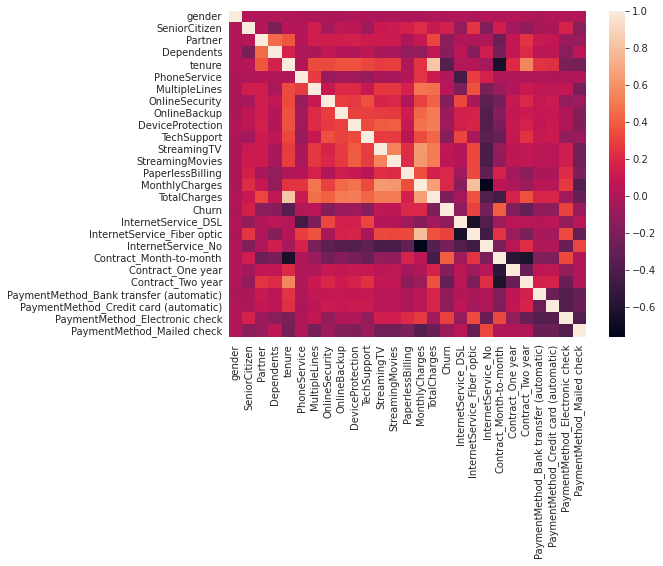

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df_clean_proc.corr())

plt.show();

* Identificar a variável alvo (target)

# Preparação dos Dados


**Separar os dados entre feature matrix e target vector**

In [ ]:
# separar os dados enter feature matrix e target vector
X = df_clean_proc.drop('Churn', axis=1)
y = df_clean_proc['Churn']

# Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

**Avaliando Modelos com Cross-Validation**

In [ ]:
def val_model(X, y,clf, quite=False):

  X = np.array(X)
  y = np.array(y)

  pipeline1 = make_pipeline(StandardScaler(), clf)
  pipeline2 = make_pipeline(RobustScaler(), clf)
  pipeline3 = make_pipeline(QuantileTransformer(), clf)
  pipeline4 = make_pipeline(QuantileTransformer(output_distribution='normal'), clf)
  pipeline5 = make_pipeline(PowerTransformer(method='yeo-johnson'), clf)
  scores1 = cross_val_score(pipeline1, X, y, scoring='recall')
  scores2 = cross_val_score(pipeline2, X, y, scoring='recall')
  scores3 = cross_val_score(pipeline3, X, y, scoring='recall')
  scores4 = cross_val_score(pipeline4, X, y, scoring='recall')
  scores5 = cross_val_score(pipeline5, X, y, scoring='recall')

  if quite == False:
    print('Recall StandardScaler: {:.4f} (+/- {:.4f})'.format(scores1.mean(), scores1.std() * 2))
    print('Recall RobustScaler: {:.4f} (+/- {:.4f})'.format(scores2.mean(), scores2.std() * 2))
    print('Recall QuantileTransformer: {:.4f} (+/- {:.4f})'.format(scores3.mean(), scores3.std() * 2))
    print('Recall QuantileTransformer-N: {:.4f} (+/- {:.4f})'.format(scores4.mean(), scores4.std() * 2))
    print('Recall PowerTransformer: {:.4f} (+/- {:.4f})'.format(scores5.mean(), scores5.std() * 2))
  return scores1.mean()

In [ ]:
# Importar Modelos a serem avaliados
rf = RandomForestClassifier()
lr = LogisticRegression()
xgb = XGBClassifier()
lda = LinearDiscriminantAnalysis()
svc = SVC()
sgd = SGDClassifier()

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model(X_train, y_train, rf)
print('\nCross-validation LR:')
score_teste2 = val_model(X_train, y_train, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model(X_train, y_train, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model(X_train, y_train, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model(X_train, y_train, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model(X_train, y_train, sgd)

Cross-validation RF:
Recall StandardScaler: 0.5036 (+/- 0.0786)
Recall2 RobustScaler: 0.5100 (+/- 0.0606)
Recall3 QuantileTransformer: 0.5121 (+/- 0.0620)
Recall4 QuantileTransformer-N: 0.5107 (+/- 0.0744)
Recall5 PowerTransformer: 0.5057 (+/- 0.0764)

Cross-validation LR:
Recall StandardScaler: 0.5592 (+/- 0.0657)
Recall2 RobustScaler: 0.5564 (+/- 0.0683)
Recall3 QuantileTransformer: 0.5485 (+/- 0.0490)
Recall4 QuantileTransformer-N: 0.5528 (+/- 0.0502)
Recall5 PowerTransformer: 0.5421 (+/- 0.0514)

Cross-validation XGB:
Recall StandardScaler: 0.5435 (+/- 0.0507)
Recall2 RobustScaler: 0.5435 (+/- 0.0507)
Recall3 QuantileTransformer: 0.5428 (+/- 0.0510)
Recall4 QuantileTransformer-N: 0.5428 (+/- 0.0510)
Recall5 PowerTransformer: 0.5435 (+/- 0.0507)

Cross-validation LDA:
Recall StandardScaler: 0.5649 (+/- 0.0558)
Recall2 RobustScaler: 0.5649 (+/- 0.0558)
Recall3 QuantileTransformer: 0.5514 (+/- 0.0361)
Recall4 QuantileTransformer-N: 0.5792 (+/- 0.0537)
Recall5 PowerTransformer: 0.5492 

## Padronização e Balanceamento dos Dados

In [ ]:
scaler = StandardScaler()
Rob_scaler = RobustScaler()
qtr = QuantileTransformer()
qtr_n = QuantileTransformer(output_distribution='normal')
pwr = PowerTransformer()

X_train_scaled = scaler.fit_transform(X_train)
X_train_Rscaled = Rob_scaler.fit_transform(X_train)
X_train_qtr = qtr.fit_transform(X_train)
X_train_qtr_n = qtr_n.fit_transform(X_train)
X_train_pwr = pwr.fit_transform(X_train)


rus = RandomUnderSampler()
X_rus_scaled, y_train_rus_scaled = rus.fit_sample(X_train_scaled, y_train)
X_rus_Rscaled, y_train_rus_Rscaled = rus.fit_sample(X_train_Rscaled, y_train)
X_rus_qtr, y_train_rus_qtr = rus.fit_sample(X_train_qtr, y_train)
X_rus_qtr_n, y_train_rus_qtr_n = rus.fit_sample(X_train_qtr_n, y_train)
X_rus_pwr, y_train_rus_pwr = rus.fit_sample(X_train_pwr, y_train)


smo = SMOTE()
X_smo_scaled, y_train_smo_scaled = smo.fit_sample(X_train_scaled, y_train)
X_smo_Rscaled, y_train_smo_Rscaled = smo.fit_sample(X_train_Rscaled, y_train)
X_smo_qtr, y_train_smo_qtr = smo.fit_sample(X_train_qtr, y_train)
X_smo_qtr_n, y_train_smo_qtr_n = smo.fit_sample(X_train_qtr_n, y_train)
X_smo_pwr, y_train_smo_pwr = smo.fit_sample(X_train_pwr, y_train)


ada = ADASYN()
X_ada_scaled, y_train_ada_scaled = ada.fit_sample(X_train_scaled, y_train)
X_ada_Rscaled, y_train_ada_Rscaled = ada.fit_sample(X_train_Rscaled, y_train)
X_ada_qtr, y_train_ada_qtr = ada.fit_sample(X_train_qtr, y_train)
X_ada_qtr_n, y_train_ada_qtr_n = ada.fit_sample(X_train_qtr_n, y_train)
X_ada_pwr, y_train_ada_pwr = ada.fit_sample(X_train_pwr, y_train)


### Balanceamento com Random UnderSampling

1    1402
0    1402
dtype: int64


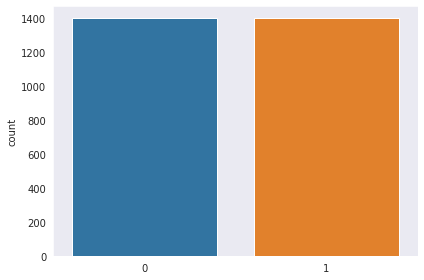

In [ ]:
print(pd.Series(y_train_rus_scaled).value_counts())

fig, ax = plt.subplots() 

sns.countplot(y_train_rus_scaled)

plt.tight_layout()


### Balanceamento com OverSampling SMOTE

1    3880
0    3880
dtype: int64


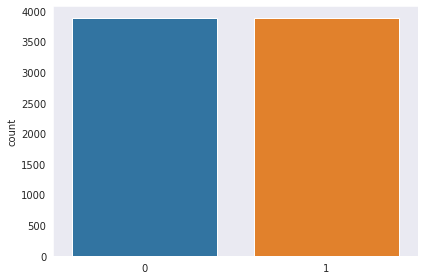

In [ ]:
print(pd.Series(y_train_smo_scaled).value_counts())

fig, ax = plt.subplots() 

sns.countplot(y_train_smo_scaled)


plt.tight_layout()

### Balanceamento com OverSampling ADASYN

0    3880
1    3827
dtype: int64


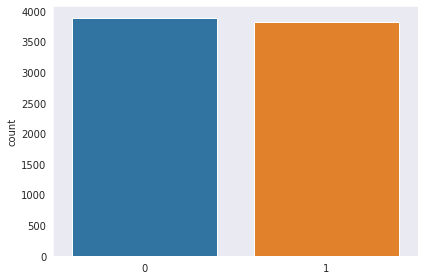

In [ ]:
print(pd.Series(y_train_ada_scaled).value_counts())

fig, ax = plt.subplots() 

sns.countplot(y_train_ada_scaled)


plt.tight_layout();

## Avaliandos Modelos com Cross-Validation (Dados Balanceados e Padronizados)

In [ ]:
def val_model_balanced(X, y,clf, quite=False):

  X = np.array(X)
  y = np.array(y)

  scores = cross_val_score(clf, X, y, scoring='recall')

  if quite == False:
    print('Recall: {:.4f} (+/- {:.4f})'.format(scores.mean(), scores.std() * 2))
  return scores.mean()

## Balanceamento RUS com StandardScaler (scaled)

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model_balanced(X_rus_scaled, y_train_rus_scaled, rf)
print('\nCross-validation LR:')
score_teste2 = val_model_balanced(X_rus_scaled, y_train_rus_scaled, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model_balanced(X_rus_scaled, y_train_rus_scaled, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model_balanced(X_rus_scaled, y_train_rus_scaled, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model_balanced(X_rus_scaled, y_train_rus_scaled, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model_balanced(X_rus_scaled, y_train_rus_scaled, sgd)

Cross-validation RF:
Recall: 0.7625 (+/- 0.0385)

Cross-validation LR:
Recall: 0.7910 (+/- 0.0626)

Cross-validation XGB:
Recall: 0.8088 (+/- 0.0640)

Cross-validation LDA:
Recall: 0.8017 (+/- 0.0533)

Cross-validation SVC:
Recall: 0.7967 (+/- 0.0544)

Cross-validation SGD:
Recall: 0.7446 (+/- 0.2477)


### Balanceamento RUS com RobustScaler (Rscaled)

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model_balanced(X_rus_Rscaled, y_train_rus_Rscaled, rf)
print('\nCross-validation LR:')
score_teste2 = val_model_balanced(X_rus_Rscaled, y_train_rus_Rscaled, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model_balanced(X_rus_Rscaled, y_train_rus_Rscaled, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model_balanced(X_rus_Rscaled, y_train_rus_Rscaled, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model_balanced(X_rus_Rscaled, y_train_rus_Rscaled, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model_balanced(X_rus_Rscaled, y_train_rus_Rscaled, sgd)

Cross-validation RF:
Recall: 0.7703 (+/- 0.0668)

Cross-validation LR:
Recall: 0.8024 (+/- 0.0464)

Cross-validation XGB:
Recall: 0.8089 (+/- 0.0674)

Cross-validation LDA:
Recall: 0.7974 (+/- 0.0430)

Cross-validation SVC:
Recall: 0.7974 (+/- 0.0543)

Cross-validation SGD:
Recall: 0.7476 (+/- 0.1604)


### Balanceamento RUS com QuantileTransformer (QTR)

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model_balanced(X_rus_qtr, y_train_rus_qtr, rf)
print('\nCross-validation LR:')
score_teste2 = val_model_balanced(X_rus_qtr, y_train_rus_qtr, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model_balanced(X_rus_qtr, y_train_rus_qtr, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model_balanced(X_rus_qtr, y_train_rus_qtr, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model_balanced(X_rus_qtr, y_train_rus_qtr, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model_balanced(X_rus_qtr, y_train_rus_qtr, sgd)

Cross-validation RF:
Recall: 0.7703 (+/- 0.0525)

Cross-validation LR:
Recall: 0.8067 (+/- 0.0654)

Cross-validation XGB:
Recall: 0.8096 (+/- 0.0593)

Cross-validation LDA:
Recall: 0.8110 (+/- 0.0579)

Cross-validation SVC:
Recall: 0.8032 (+/- 0.0635)

Cross-validation SGD:
Recall: 0.6590 (+/- 0.4227)


### Balanceamento RUS com QuantileTransformer (uniform output)

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model_balanced(X_rus_qtr_n, y_train_rus_qtr_n, rf)
print('\nCross-validation LR:')
score_teste2 = val_model_balanced(X_rus_qtr_n, y_train_rus_qtr_n, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model_balanced(X_rus_qtr_n, y_train_rus_qtr_n, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model_balanced(X_rus_qtr_n, y_train_rus_qtr_n, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model_balanced(X_rus_qtr_n, y_train_rus_qtr_n, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model_balanced(X_rus_qtr_n, y_train_rus_qtr_n, sgd)

Cross-validation RF:
Recall: 0.7789 (+/- 0.0466)

Cross-validation LR:
Recall: 0.8138 (+/- 0.0639)

Cross-validation XGB:
Recall: 0.8138 (+/- 0.0430)

Cross-validation LDA:
Recall: 0.8281 (+/- 0.0624)

Cross-validation SVC:
Recall: 0.8032 (+/- 0.0364)

Cross-validation SGD:
Recall: 0.6054 (+/- 0.5664)


### Balanceamento RUS com PowerTransformer (PWR)

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model_balanced(X_rus_pwr, y_train_rus_pwr, rf)
print('\nCross-validation LR:')
score_teste2 = val_model_balanced(X_rus_pwr, y_train_rus_pwr, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model_balanced(X_rus_pwr, y_train_rus_pwr, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model_balanced(X_rus_pwr, y_train_rus_pwr, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model_balanced(X_rus_pwr, y_train_rus_pwr, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model_balanced(X_rus_pwr, y_train_rus_pwr, sgd)

Cross-validation RF:
Recall: 0.7760 (+/- 0.0388)

Cross-validation LR:
Recall: 0.7967 (+/- 0.0720)

Cross-validation XGB:
Recall: 0.8174 (+/- 0.0541)

Cross-validation LDA:
Recall: 0.8003 (+/- 0.0677)

Cross-validation SVC:
Recall: 0.7910 (+/- 0.0587)

Cross-validation SGD:
Recall: 0.8074 (+/- 0.0689)


## Balanceamento SMOTE com StandardScaler (scaled)

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model_balanced(X_smo_scaled, y_train_smo_scaled, rf)
print('\nCross-validation LR:')
score_teste2 = val_model_balanced(X_smo_scaled, y_train_smo_scaled, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model_balanced(X_smo_scaled, y_train_smo_scaled, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model_balanced(X_smo_scaled, y_train_smo_scaled, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model_balanced(X_smo_scaled, y_train_smo_scaled, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model_balanced(X_smo_scaled, y_train_smo_scaled, sgd)

Cross-validation RF:
Recall: 0.8784 (+/- 0.2133)

Cross-validation LR:
Recall: 0.8206 (+/- 0.0365)

Cross-validation XGB:
Recall: 0.8572 (+/- 0.2798)

Cross-validation LDA:
Recall: 0.8178 (+/- 0.0404)

Cross-validation SVC:
Recall: 0.8541 (+/- 0.1075)

Cross-validation SGD:
Recall: 0.8044 (+/- 0.0704)


#### Balanceamento SMOTE com RobustScaler (Rscaled)

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model_balanced(X_smo_Rscaled, y_train_smo_Rscaled, rf)
print('\nCross-validation LR:')
score_teste2 = val_model_balanced(X_smo_Rscaled, y_train_smo_Rscaled, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model_balanced(X_smo_Rscaled, y_train_smo_Rscaled, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model_balanced(X_smo_Rscaled, y_train_smo_Rscaled, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model_balanced(X_smo_Rscaled, y_train_smo_Rscaled, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model_balanced(X_smo_Rscaled, y_train_smo_Rscaled, sgd)

Cross-validation RF:
Recall: 0.8693 (+/- 0.2310)

Cross-validation LR:
Recall: 0.8183 (+/- 0.0440)

Cross-validation XGB:
Recall: 0.8590 (+/- 0.2612)

Cross-validation LDA:
Recall: 0.8219 (+/- 0.0432)

Cross-validation SVC:
Recall: 0.8454 (+/- 0.0994)

Cross-validation SGD:
Recall: 0.8023 (+/- 0.1035)


#### Balanceamento SMOTE com QuantileTransformer (QTR)

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model_balanced(X_smo_qtr, y_train_smo_qtr, rf)
print('\nCross-validation LR:')
score_teste2 = val_model_balanced(X_smo_qtr, y_train_smo_qtr, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model_balanced(X_smo_qtr, y_train_smo_qtr, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model_balanced(X_smo_qtr, y_train_smo_qtr, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model_balanced(X_smo_qtr, y_train_smo_qtr, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model_balanced(X_smo_qtr, y_train_smo_qtr, sgd)

Cross-validation RF:
Recall: 0.8683 (+/- 0.2343)

Cross-validation LR:
Recall: 0.8085 (+/- 0.0418)

Cross-validation XGB:
Recall: 0.8595 (+/- 0.2600)

Cross-validation LDA:
Recall: 0.8124 (+/- 0.0434)

Cross-validation SVC:
Recall: 0.8430 (+/- 0.1264)

Cross-validation SGD:
Recall: 0.7848 (+/- 0.0799)


#### Balanceamento SMOTE com QuantileTransformer (uniform output)

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model_balanced(X_smo_qtr_n, y_train_smo_qtr_n, rf)
print('\nCross-validation LR:')
score_teste2 = val_model_balanced(X_smo_qtr_n, y_train_smo_qtr_n, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model_balanced(X_smo_qtr_n, y_train_smo_qtr_n, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model_balanced(X_smo_qtr_n, y_train_smo_qtr_n, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model_balanced(X_smo_qtr_n, y_train_smo_qtr_n, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model_balanced(X_smo_qtr_n, y_train_smo_qtr_n, sgd)

Cross-validation RF:
Recall: 0.8758 (+/- 0.2322)

Cross-validation LR:
Recall: 0.8268 (+/- 0.0439)

Cross-validation XGB:
Recall: 0.8639 (+/- 0.2512)

Cross-validation LDA:
Recall: 0.8415 (+/- 0.0500)

Cross-validation SVC:
Recall: 0.8536 (+/- 0.1320)

Cross-validation SGD:
Recall: 0.7729 (+/- 0.1627)


#### Balanceamento SMOTE com PowerTransformer (PWR)

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model_balanced(X_smo_pwr, y_train_smo_pwr, rf)
print('\nCross-validation LR:')
score_teste2 = val_model_balanced(X_smo_pwr, y_train_smo_pwr, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model_balanced(X_smo_pwr, y_train_smo_pwr, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model_balanced(X_smo_pwr, y_train_smo_pwr, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model_balanced(X_smo_pwr, y_train_smo_pwr, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model_balanced(X_smo_pwr, y_train_smo_pwr, sgd)

Cross-validation RF:
Recall: 0.8709 (+/- 0.2321)

Cross-validation LR:
Recall: 0.8124 (+/- 0.0533)

Cross-validation XGB:
Recall: 0.8582 (+/- 0.2754)

Cross-validation LDA:
Recall: 0.8227 (+/- 0.0457)

Cross-validation SVC:
Recall: 0.8670 (+/- 0.1131)

Cross-validation SGD:
Recall: 0.7482 (+/- 0.0520)


## Balanceamento ADASYN com StandardScaler (scaled)

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model_balanced(X_ada_scaled, y_train_ada_scaled, rf)
print('\nCross-validation LR:')
score_teste2 = val_model_balanced(X_ada_scaled, y_train_ada_scaled, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model_balanced(X_ada_scaled, y_train_ada_scaled, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model_balanced(X_ada_scaled, y_train_ada_scaled, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model_balanced(X_ada_scaled, y_train_ada_scaled, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model_balanced(X_ada_scaled, y_train_ada_scaled, sgd)


Cross-validation RF:
Recall: 0.8697 (+/- 0.1954)

Cross-validation LR:
Recall: 0.7865 (+/- 0.1006)

Cross-validation XGB:
Recall: 0.8506 (+/- 0.2769)

Cross-validation LDA:
Recall: 0.7873 (+/- 0.1097)

Cross-validation SVC:
Recall: 0.8694 (+/- 0.0955)

Cross-validation SGD:
Recall: 0.7774 (+/- 0.0902)


#### Balanceamento ADASYN com RobustScaler (Rscaled)

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model_balanced(X_ada_Rscaled, y_train_ada_Rscaled, rf)
print('\nCross-validation LR:')
score_teste2 = val_model_balanced(X_ada_Rscaled, y_train_ada_Rscaled, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model_balanced(X_ada_Rscaled, y_train_ada_Rscaled, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model_balanced(X_ada_Rscaled, y_train_ada_Rscaled, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model_balanced(X_ada_Rscaled, y_train_ada_Rscaled, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model_balanced(X_ada_Rscaled, y_train_ada_Rscaled, sgd)

Cross-validation RF:
Recall: 0.8673 (+/- 0.2175)

Cross-validation LR:
Recall: 0.7833 (+/- 0.1009)

Cross-validation XGB:
Recall: 0.8485 (+/- 0.2759)

Cross-validation LDA:
Recall: 0.7841 (+/- 0.1087)

Cross-validation SVC:
Recall: 0.8451 (+/- 0.0737)

Cross-validation SGD:
Recall: 0.8229 (+/- 0.0969)


#### Balanceamento ADASYN com QuantileTransformer (QTR)

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model_balanced(X_ada_qtr, y_train_ada_qtr, rf)
print('\nCross-validation LR:')
score_teste2 = val_model_balanced(X_ada_qtr, y_train_ada_qtr, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model_balanced(X_ada_qtr, y_train_ada_qtr, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model_balanced(X_ada_qtr, y_train_ada_qtr, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model_balanced(X_ada_qtr, y_train_ada_qtr, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model_balanced(X_ada_qtr, y_train_ada_qtr, sgd)

Cross-validation RF:
Recall: 0.8740 (+/- 0.2046)

Cross-validation LR:
Recall: 0.7640 (+/- 0.1020)

Cross-validation XGB:
Recall: 0.8538 (+/- 0.2677)

Cross-validation LDA:
Recall: 0.7645 (+/- 0.1043)

Cross-validation SVC:
Recall: 0.8608 (+/- 0.0983)

Cross-validation SGD:
Recall: 0.7665 (+/- 0.2310)


#### Balanceamento ADASYN com QuantileTransformer (uniform output)

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model_balanced(X_ada_qtr_n, y_train_ada_qtr_n, rf)
print('\nCross-validation LR:')
score_teste2 = val_model_balanced(X_ada_qtr_n, y_train_ada_qtr_n, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model_balanced(X_ada_qtr_n, y_train_ada_qtr_n, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model_balanced(X_ada_qtr_n, y_train_ada_qtr_n, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model_balanced(X_ada_qtr_n, y_train_ada_qtr_n, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model_balanced(X_ada_qtr_n, y_train_ada_qtr_n, sgd)

Cross-validation RF:
Recall: 0.8791 (+/- 0.2020)

Cross-validation LR:
Recall: 0.7894 (+/- 0.0954)

Cross-validation XGB:
Recall: 0.8613 (+/- 0.2630)

Cross-validation LDA:
Recall: 0.7964 (+/- 0.0958)

Cross-validation SVC:
Recall: 0.8649 (+/- 0.1082)

Cross-validation SGD:
Recall: 0.6345 (+/- 0.1747)


#### Balanceamento ADASYN com PowerTransformer (PWR)

In [ ]:
print('Cross-validation RF:')
score_teste1 = val_model_balanced(X_ada_pwr, y_train_ada_pwr, rf)
print('\nCross-validation LR:')
score_teste2 = val_model_balanced(X_ada_pwr, y_train_ada_pwr, lr)
print('\nCross-validation XGB:')
score_teste3 = val_model_balanced(X_ada_pwr, y_train_ada_pwr, xgb)
print('\nCross-validation LDA:')
score_teste4 = val_model_balanced(X_ada_pwr, y_train_ada_pwr, lda)
print('\nCross-validation SVC:')
score_teste5 = val_model_balanced(X_ada_pwr, y_train_ada_pwr, svc)
print('\nCross-validation SGD:')
score_teste6 = val_model_balanced(X_ada_pwr, y_train_ada_pwr, sgd)

Cross-Validation ADASYN

Cross-validation RF:
Recall: 0.8729 (+/- 0.2092)

Cross-validation LR:
Recall: 0.7615 (+/- 0.1063)

Cross-validation XGB:
Recall: 0.8519 (+/- 0.2818)

Cross-validation LDA:
Recall: 0.7698 (+/- 0.1042)

Cross-validation SVC:
Recall: 0.8664 (+/- 0.0728)

Cross-validation SGD:
Recall: 0.7670 (+/- 0.0838)


## Definindo Modelos para o Balanceamento RUS

In [ ]:
model = []
recall= []

model.append('LinearDiscriminantAnalysis RusScaled')
recall.append(val_model_balanced(X_rus_scaled, y_train_rus_scaled, lda, quite=True))  
model.append('LinearDiscriminantAnalysis RusRscaled')
recall.append(val_model_balanced(X_rus_Rscaled, y_train_rus_Rscaled, lda, quite=True))
model.append('LinearDiscriminantAnalysis RusQTR')
recall.append(val_model_balanced(X_rus_qtr, y_train_rus_qtr, lda, quite=True))
model.append('LinearDiscriminantAnalysis RusQTR-N')
recall.append(val_model_balanced(X_rus_qtr_n, y_train_rus_qtr_n, lda, quite=True))
model.append('LinearDiscriminantAnalysis RusPWR')
recall.append(val_model_balanced(X_rus_pwr, y_train_rus_pwr, lda, quite=True))

model.append('SVC RusScaled')
recall.append(val_model_balanced(X_rus_scaled, y_train_rus_scaled, svc, quite=True))
model.append('SVC RusRscaled')
recall.append(val_model_balanced(X_rus_Rscaled, y_train_rus_Rscaled, svc, quite=True))
model.append('SVC RusQTR')
recall.append(val_model_balanced(X_rus_qtr, y_train_rus_qtr, svc, quite=True))
model.append('SVC RusQTR-N')
recall.append(val_model_balanced(X_rus_qtr_n, y_train_rus_qtr_n, svc, quite=True))
model.append('SVC RusPWR')
recall.append(val_model_balanced(X_rus_pwr, y_train_rus_pwr, svc, quite=True))

model.append('XGBoost RusScaled')
recall.append(val_model_balanced(X_rus_scaled, y_train_rus_scaled, xgb, quite=True))  
model.append('XGBoost RusRscaled')
recall.append(val_model_balanced(X_rus_Rscaled, y_train_rus_Rscaled, xgb, quite=True))
model.append('XGBoost RusQTR')
recall.append(val_model_balanced(X_rus_qtr, y_train_rus_qtr, xgb, quite=True))
model.append('XGBoost RusQTR-N')
recall.append(val_model_balanced(X_rus_qtr_n, y_train_rus_qtr_n, xgb, quite=True))
model.append('XGBoost RusPWR')
recall.append(val_model_balanced(X_rus_pwr, y_train_rus_pwr, xgb, quite=True))


pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
LinearDiscriminantAnalysis RusScaled,0.808114
LinearDiscriminantAnalysis RusRscaled,0.798846
LinearDiscriminantAnalysis RusQTR,0.805269
LinearDiscriminantAnalysis RusQTR-N,0.827372
LinearDiscriminantAnalysis RusPWR,0.802410
SVC RusScaled,0.791713
SVC RusRscaled,0.785300
SVC RusQTR,0.799565
SVC RusQTR-N,0.798139
SVC RusPWR,0.785287


### Otimizando Hiperparâmetros Linear Discriminant Analysis (LDA)

In [ ]:
lda_rus_Rscaled = LinearDiscriminantAnalysis()
param_grid = {
    'solver':('svd', 'lsqr', 'eigen'),
    'shrinkage':('auto', 'None')
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(lda_rus_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus_Rscaled, y_train_rus_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8002583586626141 para {'shrinkage': 'auto', 'solver': 'lsqr'}


#### Avaliando o Desempenho do Modelo LDA

              precision    recall  f1-score   support

           0     0.9238    0.7125    0.8045      1294
           1     0.5125    0.8373    0.6358       467

    accuracy                         0.7456      1761
   macro avg     0.7181    0.7749    0.7202      1761
weighted avg     0.8147    0.7456    0.7598      1761

AUC: 0.7749



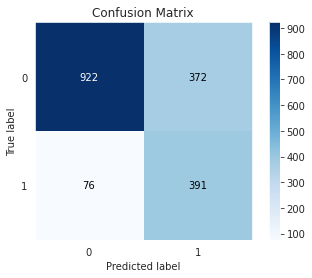

In [ ]:
lda_rus_Rscaled = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto')

lda_rus_Rscaled.fit(X_rus_Rscaled, y_train_rus_Rscaled)

X_test_Rscaled = Rob_scaler.fit_transform(X_test)

y_pred_lda = lda_rus_Rscaled.predict(X_test_Rscaled)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_lda)

print(classification_report(y_test, y_pred_lda, digits=4))

print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_lda)))


### Otimizando Hiperparâmetros SVC




In [ ]:
svc_rus_Rscaled = SVC()
param_grid = {
    'C':[0.01, 0.1, 1.0, 10],
    'kernel':('linear', 'poly', 'rbf', 'sigmoid')
      
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(svc_rus_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus_Rscaled, y_train_rus_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.9215552178318134 para {'C': 0.01, 'kernel': 'poly'}


In [ ]:
svc_rus_Rscaled = SVC(C=0.01, kernel='poly')
param_grid = {
    'degree':[3, 5, 7],
    'gamma':[1, 1.5]
      
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(svc_rus_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus_Rscaled, y_train_rus_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')


Melhor: 0.7924974670719351 para {'degree': 3, 'gamma': 1}


#### Avaliando o Desempenho do Modelo SVC

              precision    recall  f1-score   support

           0     0.9112    0.6499    0.7587      1294
           1     0.4594    0.8244    0.5900       467

    accuracy                         0.6962      1761
   macro avg     0.6853    0.7372    0.6744      1761
weighted avg     0.7914    0.6962    0.7140      1761

AUC: 0.7372



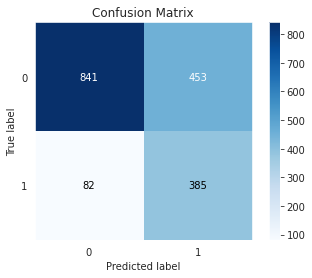

In [ ]:
svc_rus_Rscaled = SVC(C=0.01, kernel='poly', degree=3, gamma=1)

svc_rus_Rscaled.fit(X_rus_Rscaled, y_train_rus_Rscaled)

y_pred_SvcRus = svc_rus_Rscaled.predict(X_test_Rscaled)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_SvcRus)

print(classification_report(y_test, y_pred_SvcRus, digits=4))

print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_SvcRus)))


### Otimizando Hiperparâmetros XGBoost (XGB)

In [ ]:
xgb_rus_Rscaled = XGBClassifier(learning_rate=0.01)
param_grid = {
    'n_estimators':[100, 200, 1000],
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_rus_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus_Rscaled, y_train_rus_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8124265450861194 para {'n_estimators': 200}


In [ ]:
xgb_rus_Rscaled = XGBClassifier(learning_rate=0.01, n_estimators=200)
param_grid = {
    'max_depth':[1, 3, 6],
    'min_chil_weitght':[1, 5, 10]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_rus_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus_Rscaled, y_train_rus_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8481408308004055 para {'max_depth': 1, 'min_chil_weitght': 1}


In [ ]:
xgb_rus_Rscaled = XGBClassifier(learning_rate=0.01, n_estimators=200, max_depth=1, min_child_weight=1)
param_grid = {
    'gamma':[0, 1, 5]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_rus_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus_Rscaled, y_train_rus_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8623657548125634 para {'gamma': 0}


In [ ]:
xgb_rus_Rscaled = XGBClassifier(n_estimators=200, max_depth=1, min_child_weight=1, gamma=0)
param_grid = {
    'learnig_rate':[0.01, 0.015, 0.1]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_rus_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus_Rscaled, y_train_rus_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.813130699088146 para {'learnig_rate': 0.01}


#### Avaliando o Desempenho do Modelo XGB

              precision    recall  f1-score   support

           0     0.9321    0.5835    0.7177      1294
           1     0.4332    0.8822    0.5811       467

    accuracy                         0.6627      1761
   macro avg     0.6827    0.7328    0.6494      1761
weighted avg     0.7998    0.6627    0.6815      1761

AUC: 0.7328



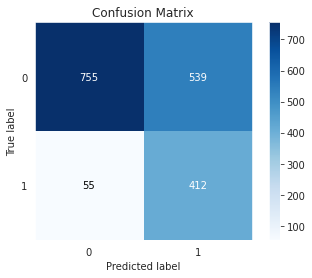

In [ ]:
xgb_rus_Rscaled = XGBClassifier(learning_rate=0.01,n_estimators=200, max_depth=1, min_child_weight=1, gamma=0)

xgb_rus_Rscaled.fit(X_rus_Rscaled, y_train_rus_Rscaled)

y_pred_XgbRus = xgb_rus_Rscaled.predict(X_test_Rscaled)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_XgbRus)

print(classification_report(y_test, y_pred_XgbRus, digits=4))

print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_XgbRus)))


## Método Ensemble para os Modelos do Balanceamento RUS

In [ ]:
xgb_ensemble_rus_Rscaled = XGBClassifier(learning_rate=0.01,n_estimators=200, max_depth=1, min_child_weight=1, gamma=0)
lda_ensemble_rus_Rscaled = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto') 
svc_ensemble_rus_Rscaled = SVC(C=0.01, kernel='poly', degree=3, gamma=1, probability=True)
voting_clf_rus = VotingClassifier(estimators=[('XGB', xgb_ensemble_rus_Rscaled), ('LDA', lda_ensemble_rus_Rscaled), ('SVC', svc_ensemble_rus_Rscaled)])


for model in (xgb_ensemble_rus_Rscaled, lda_ensemble_rus_Rscaled, svc_ensemble_rus_Rscaled, voting_clf_rus):
  model.fit(X_rus_Rscaled, y_train_rus_Rscaled)

model = []
AUC = []

for clf in (xgb_ensemble_rus_Rscaled, lda_ensemble_rus_Rscaled, svc_ensemble_rus_Rscaled, voting_clf_rus):
  y_pred_ensemble = clf.predict(X_test_Rscaled)
  model.append(clf.__class__.__name__)
  AUC.append(roc_auc_score(y_test, y_pred_ensemble))


pd.DataFrame(data=AUC, index=model, columns=["AUC"])


,AUC
XGBClassifier,0.732845
LinearDiscriminantAnalysis,0.763410
SVC,0.720777
VotingClassifier,0.754555


### Otimizando Hiperparâmetros Voting Classifier

In [ ]:
voting_clf_rus = VotingClassifier(estimators=[('XGB', xgb_ensemble_rus_Rscaled), ('LDA', lda_ensemble_rus_Rscaled), ('SVC', svc_ensemble_rus_Rscaled)])

param_grid = {
      'voting':('hard', 'soft')
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(voting_clf_rus, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus_Rscaled, y_train_rus_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8116767983789261 para {'voting': 'hard'}


In [ ]:
voting_clf_rus = VotingClassifier(estimators=[('XGB', xgb_ensemble_rus_Rscaled), ('LDA', lda_ensemble_rus_Rscaled), ('SVC', svc_ensemble_rus_Rscaled)]
                              , voting='hard')
param_grid = {
        'n_jobs':range(-1, 3, 4)
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(voting_clf_rus, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_rus_Rscaled, y_train_rus_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')


Melhor: 0.8123809523809523 para {'n_jobs': -1}


#### Avaliando o Desempenho do Voting Classifier

              precision    recall  f1-score   support

           0     0.9153    0.6847    0.7834      1294
           1     0.4855    0.8244    0.6111       467

    accuracy                         0.7217      1761
   macro avg     0.7004    0.7546    0.6972      1761
weighted avg     0.8013    0.7217    0.7377      1761

AUC: 0.7546



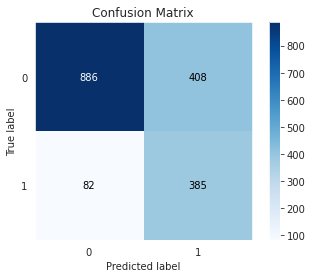

In [ ]:
voting_clf_rus = VotingClassifier(estimators=[('XGB', xgb_ensemble_rus_Rscaled), ('LDA', lda_ensemble_rus_Rscaled), ('SVC', svc_ensemble_rus_Rscaled)]
                              , voting='hard', n_jobs=-1)

voting_clf_rus.fit(X_rus_Rscaled, y_train_rus_Rscaled)

y_pred_voting_clf_rus = voting_clf_rus.predict(X_test_Rscaled)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_voting_clf_rus)

print(classification_report(y_test, y_pred_voting_clf_rus, digits=4))

print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_voting_clf_rus)))


## Definindo Modelos para o Balanceamento SMOTE

In [ ]:
model = []
recall= []

model.append('Random Forest SmoScaled')
recall.append(val_model_balanced(X_smo_scaled, y_train_smo_scaled, rf, quite=True))  
model.append('Random Forest SmoRscaled')
recall.append(val_model_balanced(X_smo_Rscaled, y_train_smo_Rscaled, rf, quite=True))
model.append('Random Forest SmoQTR')
recall.append(val_model_balanced(X_smo_qtr, y_train_smo_qtr, rf, quite=True))
model.append('Random Forest SmoQTR-N')
recall.append(val_model_balanced(X_smo_qtr_n, y_train_smo_qtr_n, rf, quite=True))
model.append('Random Forest SmoPWR')
recall.append(val_model_balanced(X_smo_pwr, y_train_smo_pwr, rf, quite=True))

model.append('XGBoost smoScaled')
recall.append(val_model_balanced(X_smo_scaled, y_train_smo_scaled, xgb, quite=True))
model.append('XGBoost smoRscaled')
recall.append(val_model_balanced(X_smo_Rscaled, y_train_smo_Rscaled, xgb, quite=True))
model.append('XGBoost smoQTR')
recall.append(val_model_balanced(X_smo_qtr, y_train_smo_qtr, xgb, quite=True))
model.append('XGBoost smoQTR-N')
recall.append(val_model_balanced(X_smo_qtr_n, y_train_smo_qtr_n, xgb, quite=True))
model.append('XGBoost smoPWR')
recall.append(val_model_balanced(X_smo_pwr, y_train_smo_pwr, xgb, quite=True))

model.append('LinearDiscriminantAnalysis smoScaled')
recall.append(val_model_balanced(X_smo_scaled, y_train_smo_scaled, lda, quite=True))  
model.append('LinearDiscriminantAnalysis smoRscaled')
recall.append(val_model_balanced(X_smo_Rscaled, y_train_smo_Rscaled, lda, quite=True))
model.append('LinearDiscriminantAnalysis smoQTR')
recall.append(val_model_balanced(X_smo_qtr, y_train_smo_qtr, lda, quite=True))
model.append('LinearDiscriminantAnalysis smoQTR-N')
recall.append(val_model_balanced(X_smo_qtr_n, y_train_smo_qtr_n, lda, quite=True))
model.append('LinearDiscriminantAnalysis smoPWR')
recall.append(val_model_balanced(X_smo_pwr, y_train_smo_pwr, lda, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
Random Forest SmoScaled,0.865722
Random Forest SmoRscaled,0.873196
Random Forest SmoQTR,0.869845
Random Forest SmoQTR-N,0.870876
Random Forest SmoPWR,0.869845
XGBoost smoScaled,0.847423
XGBoost smoRscaled,0.847165
XGBoost smoQTR,0.857990
XGBoost smoQTR-N,0.860825
XGBoost smoPWR,0.855412


### Otimizando Hiperparâmetros do Modelo Random Forest (RF)

In [ ]:
rf_smo_Rscaled = RandomForestClassifier()
param_grid = {
  'bootstrap': [True, False],
  'max_depth': [5, 10, 20, 30, 40, 50, None],

}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(rf_smo_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_smo_Rscaled, y_train_smo_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8842783505154639 para {'bootstrap': False, 'max_depth': 10}


In [ ]:
rf_smo_Rscaled = RandomForestClassifier(bootstrap=False, max_depth=10)
param_grid = {
    'max_features':[2, 3, 5],
    'min_samples_leaf':[3, 4, 5]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(rf_smo_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_smo_Rscaled, y_train_smo_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8806701030927835 para {'max_features': 2, 'min_samples_leaf': 3}


In [ ]:
rf_smo_Rscaled = RandomForestClassifier(bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=3)
param_grid = {
    'min_samples_split':[6, 8, 10, 12],
    'n_estimators':[100, 200, 300]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(rf_smo_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_smo_Rscaled, y_train_smo_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8809278350515465 para {'min_samples_split': 10, 'n_estimators': 100}


#### Avaliando o Desempenho do Modelo RF

              precision    recall  f1-score   support

           0     0.8945    0.7991    0.8441      1294
           1     0.5702    0.7388    0.6437       467

    accuracy                         0.7831      1761
   macro avg     0.7324    0.7689    0.7439      1761
weighted avg     0.8085    0.7831    0.7909      1761

AUC: 0.7689



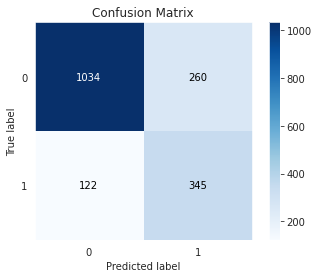

In [ ]:
rf_smo_Rscaled = RandomForestClassifier(bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=100)

rf_smo_Rscaled.fit(X_smo_Rscaled, y_train_smo_Rscaled)

y_pred_rfSmo = rf_smo_Rscaled.predict(X_test_Rscaled)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_rfSmo)

print(classification_report(y_test, y_pred_rfSmo, digits=4))

print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_rfSmo)))



### Otimizando Hiperparâmetros Modelo XGBoost (XGB) 


In [ ]:
xgb_smo_Rscaled = XGBClassifier(learning_rate=0.01)
param_grid = {
  'n_estimators':[100, 200, 300, 400],
  'max_depth':[1, 2, 3]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_smo_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_smo_Rscaled, y_train_smo_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8922680412371135 para {'max_depth': 1, 'n_estimators': 100}


In [ ]:
xgb_smo_Rscaled = XGBClassifier(learning_rate=0.01, n_estimators=100, max_depth=1)
param_grid = {
  'min_child_weight':[1, 3, 5],
  'gamma':[0, 1, 5]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_smo_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_smo_Rscaled, y_train_smo_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8922680412371135 para {'gamma': 0, 'min_child_weight': 1}


In [ ]:
xgb_smo_Rscaled = XGBClassifier(n_estimators=100, max_depth=1, min_child_weight=1, gamma=0)
param_grid = {
  'learning_rate':[0.01, 0.02, 0.04, 0.1]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_smo_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_smo_Rscaled, y_train_smo_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8922680412371132 para {'learning_rate': 0.01}


#### Avaliando o Desempenho do Modelo XGB 


              precision    recall  f1-score   support

           0     0.9312    0.5541    0.6948      1294
           1     0.4178    0.8865    0.5679       467

    accuracy                         0.6422      1761
   macro avg     0.6745    0.7203    0.6313      1761
weighted avg     0.7950    0.6422    0.6611      1761

AUC: 0.7203



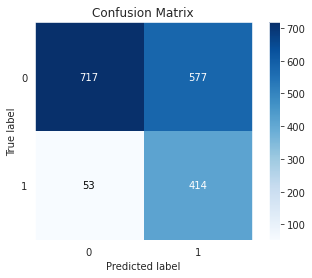

In [ ]:
xgb_smo_Rscaled = XGBClassifier(learning_rate=0.01, n_estimators=100, max_depth=1, min_child_weight=1, gamma=0)

xgb_smo_Rscaled.fit(X_smo_Rscaled, y_train_smo_Rscaled)

y_pred_Xgbsmo = xgb_smo_Rscaled.predict(X_test_Rscaled)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_Xgbsmo)

print(classification_report(y_test, y_pred_Xgbsmo, digits=4))

print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_Xgbsmo)))


### Otimizando Hiperparâmetros do Modelo Linear Discriminant Analysis (LDA)

In [ ]:
lda_smo_Rscaled = LinearDiscriminantAnalysis()
param_grid = {
  'solver':('svd', 'lsqr', 'eigen'),
  'shrinkage':[0, 1, 0.01]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(lda_smo_Rscaled, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_smo_Rscaled, y_train_smo_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8164948453608247 para {'shrinkage': 1, 'solver': 'lsqr'}


#### Avaliando o Desempenho do Modelo LDA

              precision    recall  f1-score   support

           0     0.9127    0.7025    0.7939      1294
           1     0.4967    0.8137    0.6169       467

    accuracy                         0.7320      1761
   macro avg     0.7047    0.7581    0.7054      1761
weighted avg     0.8024    0.7320    0.7469      1761

AUC: 0.7581



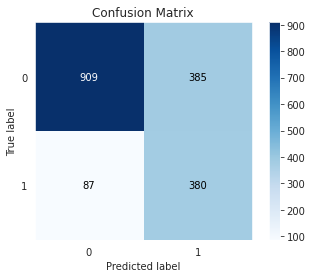

In [ ]:
lda_smo_Rscaled = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=1)

lda_smo_Rscaled.fit(X_smo_Rscaled, y_train_smo_Rscaled)

y_pred_ldasmo = lda_smo_Rscaled.predict(X_test_Rscaled)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_ldasmo)

print(classification_report(y_test, y_pred_ldasmo, digits=4))

print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_ldasmo)))


## Método Ensemble para os Modelos do Balanceamento SMOTE

In [ ]:
rf_ensemble_smo_Rscaled = RandomForestClassifier(bootstrap=False, max_depth=10, max_features=2, min_samples_leaf=3, min_samples_split=6, n_estimators=100)
lda_ensemble_smo_Rscaled = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto') 
xgb_ensemble_smo_Rscaled = XGBClassifier(learning_rate=0.01, n_estimators=100, max_depth=1, min_child_weight=1, gamma=0)
voting_clf_smo = VotingClassifier(estimators=[('RF', rf_ensemble_smo_Rscaled), ('LDA', lda_ensemble_smo_Rscaled), ('XGB', xgb_ensemble_smo_Rscaled)])


for model in (rf_ensemble_smo_Rscaled, lda_ensemble_smo_Rscaled, xgb_ensemble_smo_Rscaled, voting_clf_smo):
  model.fit(X_smo_Rscaled, y_train_smo_Rscaled)

model = []
AUC = []

for clf in (rf_ensemble_smo_Rscaled, lda_ensemble_smo_Rscaled, xgb_ensemble_smo_Rscaled, voting_clf_smo):
  y_pred_ensemble = clf.predict(X_test_Rscaled)
  model.append(clf.__class__.__name__)
  AUC.append(roc_auc_score(y_test, y_pred_ensemble))


pd.DataFrame(data=AUC, index=model, columns=["AUC"])

,AUC
RandomForestClassifier,0.772723
LinearDiscriminantAnalysis,0.778214
XGBClassifier,0.737731
VotingClassifier,0.775597


### Otimizando Hiperparâmetros Voting Classifier

In [ ]:
voting_clf_smo = VotingClassifier(estimators=[('RF', rf_ensemble_smo_Rscaled), ('LDA', lda_ensemble_smo_Rscaled), ('XGB', xgb_ensemble_smo_Rscaled)])
param_grid = {
      'voting':('hard', 'soft')
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(voting_clf_smo, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_smo_Rscaled, y_train_smo_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.856701030927835 para {'voting': 'hard'}


In [ ]:
voting_clf_smo = VotingClassifier(estimators=[('RF', rf_ensemble_smo_Rscaled), ('LDA', lda_ensemble_smo_Rscaled)], voting='hard')
param_grid = {
      'n_jobs':[1, 2, 3, -1]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(voting_clf_smo, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_smo_Rscaled, y_train_smo_Rscaled)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.7806701030927835 para {'n_jobs': 2}


#### Avaliando o Desempenho do Voting Classifier

              precision    recall  f1-score   support

           0     0.8943    0.8107    0.8504      1294
           1     0.5833    0.7345    0.6502       467

    accuracy                         0.7905      1761
   macro avg     0.7388    0.7726    0.7503      1761
weighted avg     0.8118    0.7905    0.7973      1761

AUC: 0.7726



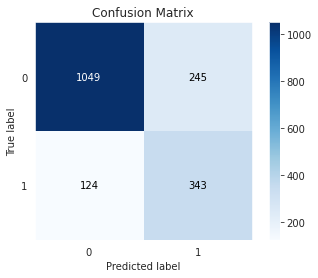

In [ ]:
voting_clf_smo = VotingClassifier(estimators=[('RF', rf_ensemble_smo_Rscaled), ('LDA', lda_ensemble_smo_Rscaled)], voting='hard', n_jobs=2)

voting_clf_smo.fit(X_smo_Rscaled, y_train_smo_Rscaled)

y_pred_voting_clf_smo = voting_clf_smo.predict(X_test_Rscaled)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_voting_clf_smo)

print(classification_report(y_test, y_pred_voting_clf_smo, digits=4))

print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_voting_clf_smo)))

## Definindo Modelos para o Balanceamento ADASYN

In [ ]:
model = []
recall= []

model.append('Random Forest adaScaled')
recall.append(val_model_balanced(X_ada_scaled, y_train_ada_scaled, rf, quite=True))  
model.append('Random Forest adaRscaled')
recall.append(val_model_balanced(X_ada_Rscaled, y_train_ada_Rscaled, rf, quite=True))
model.append('Random Forest adaQTR')
recall.append(val_model_balanced(X_ada_qtr, y_train_ada_qtr, rf, quite=True))
model.append('Random Forest adaQTR-N')
recall.append(val_model_balanced(X_ada_qtr_n, y_train_ada_qtr_n, rf, quite=True))
model.append('Random Forest adaPWR')
recall.append(val_model_balanced(X_ada_pwr, y_train_ada_pwr, rf, quite=True))

model.append('XGBoost adaScaled')
recall.append(val_model_balanced(X_ada_scaled, y_train_ada_scaled, xgb, quite=True))
model.append('XGBoost adaRscaled')
recall.append(val_model_balanced(X_ada_Rscaled, y_train_ada_Rscaled, xgb, quite=True))
model.append('XGBoost adaQTR')
recall.append(val_model_balanced(X_ada_qtr, y_train_ada_qtr, xgb, quite=True))
model.append('XGBoost adaQTR-N')
recall.append(val_model_balanced(X_ada_qtr_n, y_train_ada_qtr_n, xgb, quite=True))
model.append('XGBoost adaPWR')
recall.append(val_model_balanced(X_ada_pwr, y_train_ada_pwr, xgb, quite=True))

model.append('Lda adaScaled')
recall.append(val_model_balanced(X_ada_scaled, y_train_ada_scaled, lda, quite=True))  
model.append('Lda adaRscaled')
recall.append(val_model_balanced(X_ada_Rscaled, y_train_ada_Rscaled, lda, quite=True))
model.append('Lda adaQTR')
recall.append(val_model_balanced(X_ada_qtr, y_train_ada_qtr, lda, quite=True))
model.append('Lda adaQTR-N')
recall.append(val_model_balanced(X_ada_qtr_n, y_train_ada_qtr_n, lda, quite=True))
model.append('Lda adaPWR')
recall.append(val_model_balanced(X_ada_pwr, y_train_ada_pwr, lda, quite=True))

pd.DataFrame(data=recall, index=model, columns=['Recall'])

,Recall
Random Forest adaScaled,0.865715
Random Forest adaRscaled,0.865891
Random Forest adaQTR,0.868682
Random Forest adaQTR-N,0.866904
Random Forest adaPWR,0.863636
XGBoost adaScaled,0.837987
XGBoost adaRscaled,0.843152
XGBoost adaQTR,0.844070
XGBoost adaQTR-N,0.843990
XGBoost adaPWR,0.841097


### Otimizando Hiperparâmetros do Modelo Random Forest (RF)

In [ ]:
rf_ada_qtr = RandomForestClassifier()
param_grid = {
  'bootstrap': [True, False],
  'max_depth': [5, 10, 20, 30, 40, 50, None],

}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(rf_ada_qtr, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ada_qtr, y_train_ada_qtr)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8959222769567597 para {'bootstrap': False, 'max_depth': 10}


In [ ]:
rf_ada_qtr = RandomForestClassifier(bootstrap=False, max_depth=10)
param_grid = {
  'max_features': [3, 4, 5, 6],
  'min_samples_leaf': [2, 3, 4, 5, 6],

}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(rf_ada_qtr, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ada_qtr, y_train_ada_qtr)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8956696560144835 para {'max_features': 5, 'min_samples_leaf': 2}


In [ ]:
rf_ada_qtr = RandomForestClassifier(bootstrap=False, max_depth=10, max_features=5, min_samples_leaf=2)
param_grid = {
    'min_samples_split':[8, 10, 12, 16],
    'n_estimators':[200, 300, 400],

}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(rf_ada_qtr, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ada_qtr, y_train_ada_qtr)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8940746354539458 para {'min_samples_split': 8, 'n_estimators': 300}


#### Avaliando o Desempenho do Modelo RF

              precision    recall  f1-score   support

           0     0.8917    0.7767    0.8302      1294
           1     0.5442    0.7388    0.6267       467

    accuracy                         0.7666      1761
   macro avg     0.7180    0.7577    0.7285      1761
weighted avg     0.7996    0.7666    0.7763      1761

AUC: 0.7577



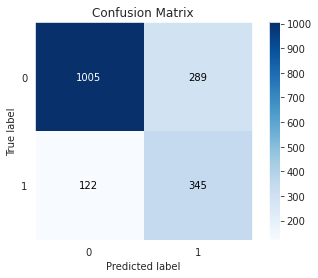

In [ ]:
rf_ada_qtr = RandomForestClassifier(bootstrap=False, max_depth=10, max_features=5, min_samples_leaf=2, n_estimators=300, min_samples_split=8)

rf_ada_qtr.fit(X_ada_qtr, y_train_ada_qtr)
X_test_qtr = qtr.fit_transform(X_test)

y_pred_rfAda = rf_ada_qtr.predict(X_test_qtr)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_rfAda)

print(classification_report(y_test, y_pred_rfAda, digits=4))

print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_rfAda)))


### Otimizando Hiperparâmetros do Modelo XGBoost (XGB)

In [ ]:
xgb_ada_qtr = XGBClassifier(learning_rate=0.01)
param_grid = {
    'n_estimators':[400, 500, 600],
    'max_depth':[3, 4, 5, 6]

}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_ada_qtr, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ada_qtr, y_train_ada_qtr)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8784430129257714 para {'max_depth': 5, 'n_estimators': 400}


In [ ]:
xgb_ada_qtr = XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=400)
param_grid = {
  'gamma':[0, 1, 5],
  'min_child_weight':[1, 3, 5]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_ada_qtr, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ada_qtr, y_train_ada_qtr)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8765778283019662 para {'gamma': 1, 'min_child_weight': 1}


In [ ]:
xgb_ada_qtr = XGBClassifier(max_depth=5, n_estimators=400, gamma=1, min_child_weight=1)
param_grid = {
  'learning_rate':[0.01, 0.05, 0.1]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(xgb_ada_qtr, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ada_qtr, y_train_ada_qtr)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8781875850841369 para {'learning_rate': 0.01}


#### Avaliando o Desempenho do Modelo XGB

              precision    recall  f1-score   support

           0     0.8927    0.7906    0.8385      1294
           1     0.5593    0.7366    0.6359       467

    accuracy                         0.7763      1761
   macro avg     0.7260    0.7636    0.7372      1761
weighted avg     0.8043    0.7763    0.7848      1761

AUC: 0.7636



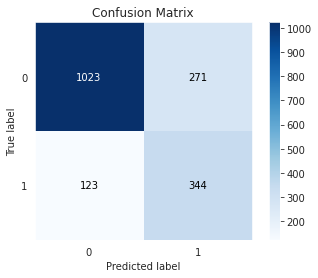

In [ ]:
xgb_ada_qtr = XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=400, gamma=1, min_child_weight=1)
xgb_ada_qtr.fit(X_ada_qtr, y_train_ada_qtr)

y_pred_xgbAda = xgb_ada_qtr.predict(X_test_qtr)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_xgbAda)

print(classification_report(y_test, y_pred_xgbAda, digits=4))

print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_xgbAda)))

### Otimizando Hiperparâmetros do Modelo Linear Discriminant Analysis (LDA)

In [ ]:
lda_ada_qtr = LinearDiscriminantAnalysis()
param_grid = {
    'solver':['lsqr', 'svd', 'eigen'],
    'shrinkage':[0, 1, 0.01]
      
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(lda_ada_qtr, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ada_qtr, y_train_ada_qtr)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.7608528763701178 para {'shrinkage': 0.01, 'solver': 'lsqr'}


#### Avaliando o Desempenho do Modelo LDA

              precision    recall  f1-score   support

           0     0.9235    0.7179    0.8078      1294
           1     0.5166    0.8351    0.6383       467

    accuracy                         0.7490      1761
   macro avg     0.7200    0.7765    0.7231      1761
weighted avg     0.8156    0.7490    0.7629      1761

AUC: 0.7765



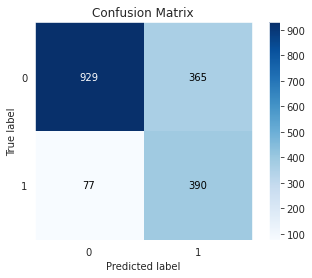

In [ ]:
lda_ada_qtr = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.01)

lda_ada_qtr.fit(X_ada_qtr, y_train_ada_qtr)

y_pred_ldaAda = lda_ada_qtr.predict(X_test_qtr)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_ldaAda)

print(classification_report(y_test, y_pred_ldaAda, digits=4))

print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_ldaAda)))

## Método Ensemble para os Modelos do Balanceamento ADASYN

In [ ]:
rf_ensemble_ada_qtr = RandomForestClassifier(bootstrap=False, max_depth=10, max_features=5, min_samples_leaf=2, n_estimators=300, min_samples_split=8)
xgb_ensemble_ada_qtr = XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=400, gamma=1, min_child_weight=1) 
lda_ensemble_ada_qtr = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=0.01)
voting_clf_ada = VotingClassifier(estimators=[('RF', rf_ensemble_ada_qtr), ('XGB', xgb_ensemble_ada_qtr), ('LDA', lda_ensemble_ada_qtr)])


for model in (rf_ensemble_ada_qtr, xgb_ensemble_ada_qtr, lda_ensemble_ada_qtr, voting_clf_ada):
  model.fit(X_ada_qtr, y_train_ada_qtr)

model = []
AUC = []

for clf in (rf_ensemble_ada_qtr, xgb_ensemble_ada_qtr, lda_ensemble_ada_qtr, voting_clf_ada):
  y_pred_ensemble = clf.predict(X_test_qtr)
  model.append(clf.__class__.__name__)
  AUC.append(roc_auc_score(y_test, y_pred_ensemble))


pd.DataFrame(data=AUC, index=model, columns=["AUC"])

,AUC
RandomForestClassifier,0.759046
XGBClassifier,0.763594
LinearDiscriminantAnalysis,0.776523
VotingClassifier,0.768416


### Otimizando Hiperparâmetros do Voting Classifier

In [ ]:
voting_clf_ada = VotingClassifier(estimators=[('RF', rf_ensemble_ada_qtr), ('XGB', xgb_ensemble_ada_qtr), ('LDA', lda_ensemble_ada_qtr)])
param_grid = {
      'voting':('hard', 'soft')
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(voting_clf_ada, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ada_qtr, y_train_ada_qtr)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8837368251161355 para {'voting': 'hard'}


In [ ]:
voting_clf_ada = VotingClassifier(estimators=[('RF', rf_ensemble_ada_qtr), ('XGB', xgb_ensemble_ada_qtr), ('LDA', lda_ensemble_ada_qtr)], voting='hard')
param_grid = {
      'n_jobs':[1, 2, 3, -1]
}

kfold = StratifiedKFold(n_splits=10, shuffle=True)
grid_search = GridSearchCV(voting_clf_ada, param_grid, scoring='recall', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_ada_qtr, y_train_ada_qtr)

print(f'Melhor: {grid_result.best_score_} para {grid_result.best_params_}')

Melhor: 0.8824210910417808 para {'n_jobs': 2}


#### Avaliando o Desempenho do Voting Classifier

              precision    recall  f1-score   support

           0     0.8943    0.8107    0.8504      1294
           1     0.5833    0.7345    0.6502       467

    accuracy                         0.7905      1761
   macro avg     0.7388    0.7726    0.7503      1761
weighted avg     0.8118    0.7905    0.7973      1761

AUC: 0.7726



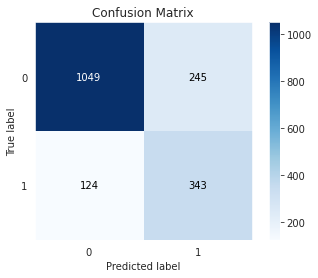

In [ ]:
voting_clf_ada = VotingClassifier(estimators=[('RF', rf_ensemble_ada_qtr), ('XGB', xgb_ensemble_ada_qtr), ('LDA', lda_ensemble_ada_qtr)], voting='hard', n_jobs=2)

voting_clf_ada.fit(X_ada_qtr, y_train_ada_qtr)

y_pred_voting_clf_ada = voting_clf_ada.predict(X_test_qtr)

skplt.metrics.plot_confusion_matrix(y_test, y_pred_voting_clf_smo)

print(classification_report(y_test, y_pred_voting_clf_smo, digits=4))

print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_voting_clf_smo)))

# Conclusão